<h1 style="color:#00A6D6;">Introduction to Quantum Cryptography - Jupyter Notebooks</h1>
<h2 style="color:#00A6D6;">Chapter 2 - Quantum tools and a first protocol</h2>

Welcome to the lab exercises in Julia for Chapter 2. If you followed the exercises for Chapter 1, you can skip right ahead to the material!

These notebooks are meant to help you study the material by performing many calculations in an easy and intuitive manner - in short, by playing around!

Each notebook consists out of two types of parts:

First off, there are parts where Julia is used to make certain calculations and visualize the outcomes: The computer programming makes it possible to calculate and visualize things that are otherwise difficult. You may wish to change the examples, or extend them to perform other calculations that help you become familiar with the material in our class and beyond. 

Secondly, each notebook has a few homework exercises marked "Exercises". These are calculations that we would definitely like you to perform.

### If you have never used a Julia sheet before, we recommend you to begin with the "Getting Started" notebook 

Ready? Then let's get started! Click shift-enter in the box below to load the first snippet of Julia!

In [1]:
include("source/main.jl"); # load the "quantum toolbox"

WebIO._IJuliaInit()

Notice that the line above will make the Julia compiler compile several packages. After compiling them it will print several info and warning messages.

* <a href="#chapter2"> Chapter 2: One Time Pad </a>

    * <a href="#density"> Density Matrices </a>

    * <a href="#cotp"> Classical One Time Pad </a>

    * <a href="#qotp"> Quantum One Time Pad </a>
    
    * <a href="#cqstates"> Classical Quantum States </a>

    * <a href="#gmeasurements"> Generalized Measurements </a>
    
    * <a href="#ptrace"> Partial Trace </a>

------
<a id="density"></a>
<h2 style="color:#00A6D6;"> Density Matrices </h2>

The first thing we learned in this chapter was an alternate way of writing quantum states: as density matrices. This description is essential when we want to describe part of a larger quantum system. For example, we may have two qubits A and B in a state $|\Psi_{AB}\rangle$ and would like to have a mathematical way of writing down the state of A. We will explore this application of density matrices in detail below!

When is a matrix $\rho$ a density matrix? Remember that is should satisfy two conditions. First $\rho \geq 0$, that is $\rho^\dagger = \rho$ ($\rho$ is Hermitian) and should have no negative eigenvalues! Second, $Tr(\rho) = 1$.

Let's investigate how we can check these conditions in Julia.

In [2]:
# Let's define a density matrix
rho = 0.5*[1 1; 1 1];

# Is rho Hermitian?
print("Hermitian ")
show(rho == rho')
print("\n")

# Does it have any negative eigenvalues?
print("Eigenvalues are ")
eVal = eigvals(rho);
show(round.(eVal,digits=3))
print("\n")

# Does it have trace 1?
print("Trace of rho is ")
Tr = tr(rho);
show(round.(Tr,digits=3))

Hermitian true
Eigenvalues are [0.0, 1.0]
Trace of rho is 1.0

As an exercise for yourself, is the following a valid density matrix - i.e., a valid quantum state?

$$\rho = \frac{1}{2} \left(\begin{array}{cc} 1 & - i\\ - i & 1\end{array}\right)$$

In [3]:
# Your Julia code goes here
rho = ;

# Is rho Hermitian?
print("Hermitian ")
show(rho == rho')
print("\n")

# Does it have any negative eigenvalues?
print("Eigenvalues are ")
eVal = eigvals(rho);
show(round.(eVal,digits=3))
print("\n")

# Does it have trace 1?
print("Trace of rho is ")
Tr = tr(rho);
show(round.(Tr,digits=3))

LoadError: syntax: unexpected ";"

Let's now look at the other convenient feature of density matrices, namely that they allow us to represent probabilistic mixtures of states. 

Imagine that our qubit is in state

* $|\psi_0\rangle$ with probability $p_0$ 

and in 

* $|\psi_1\rangle$ with probability $p_1$.

where $p_0 + p_1 = 1$.

We can describe the effective state of the qubit as a density matrix $\rho$

$$ \rho = p_0 \cdot |\psi_0 \rangle\langle \psi_0| + p_1 \cdot |\psi_1 \rangle\langle \psi_1| $$

To see how this works, let us now compute some density matrices created by such a probablisitic process! Consider a process that prepares a qubit in the states

$$ |\psi_0\rangle = |0\rangle \quad \mbox{ with probability } p_0 = \frac{2}{3}\ , $$
$$ |\psi_1\rangle = |+\rangle \quad \mbox{ with probability } p_1 = \frac{1}{3}\ .$$

Let's now compute the density matrix

$$ \rho = p_0 \cdot |\psi_0 \rangle\langle \psi_0| + p_1 \cdot |\psi_1 \rangle\langle \psi_1| \:.$$


In [4]:
# Let's first define the two states as vectors
ψ_0 = [1,0]         # define the ψ_0 state, default |0>
ψ_1 = [1,1]/sqrt(2) # define the ψ_1 state, default |+>

# Let's enter the two probabilities p0 and p1
p0 = 2/3;
p1 = 1/3;

# To compute rho, we first compute the density matrices |ψ0⟩⟨ψ0| and |ψ1⟩⟨ψ1|
rho0 = ψ_0 * ψ_0';
rho1 = ψ_1 * ψ_1';

# We're now ready to compute the density matrix by averaging 
rho = p0 * rho0 + p1 * rho1;

# Let's round the entries of the density matrix for easy viewing
digits = 3;
rhoRounded = round.(rho,digits=digits);
display(rhoRounded)

2×2 Matrix{Float64}:
 0.833  0.167
 0.167  0.167

It is instructive to have a look at what this density matrix looks like as a point on the Bloch sphere. Remember, that pure states live on the surface of the Bloch sphere and mixed state in the interior.

The code below generates a Bloch sphere representation of $|0\rangle$, $|+\rangle$  and $\rho$.

Using the slider you can select values for $p_0$ and see how this influences the position of $\rho$ in the sphere. Can't quite make sense of where you ended up? Change the view angle! Note that as usual it may take a moment for the image to be updated.

In [5]:
# First we convert the two individual states to Bloch vectors
v_0 = ket_to_bloch(ψ_0) # construct the bloch vector associated with ψ_0
v_1 = ket_to_bloch(ψ_1) # idem.

f1 = figure(figsize=(10,10)) # make a new figure
b1 = Bloch()  # instantiate bloch sphere instance

@manipulate for view_angle = [60,15,-130], p_0 = 0:0.1:1
    clear(b1)
    add_vector(b1,v_0,L"\$\\psi\_0\$") # add v_0 to the bloch sphere
    add_vector(b1,v_1,L"\$\\psi\_1\$") # idem.
    
    # The density matrix rho has a Bloch vector that is the average of the two individual Bloch vectors!
    add_vector(b1,p_0*v_0 + (1-p_0)*v_1,L"\$\\rho\$") # add Bloch vector of ρ which is a mixture of ψ_0 and ψ_1
        
    withfig(f1) do
        render(b1,view_angle)
    end
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["view_angle"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 3, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(2), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\swehner\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\swehner\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\swehner\\.julia\\packages\\InteractBase\\LJXv3\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\swehner\\.julia\\packages\\InteractBase\\LJXv3\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\swehner\\.julia\\packages\\Interact\\PENUy\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable) @0x0000019f1f517c20, Task (runnable) @0x0000019f1f517c20), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (2, 140711749323008, 1784468324432)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"60\",\"15\",\"-130\"],\"changes\":WebIO.getval({\"name\":\"c

<h3 style="color:#00A6D6;" > Exercise 1 </h3>

You're now ready for the first exercise of this chapter!

Suppose we have a qubit that is in the states

$$ \lvert\psi_0\rangle = \frac{\lvert0\rangle + i \: \lvert1\rangle}{\sqrt{2}} \quad \mbox{ with probability } p_0 = \frac{1}{2}\ , $$


$$ \lvert\psi_1\rangle = \frac{\lvert0\rangle - i \:\lvert1\rangle}{\sqrt{2}}  \quad \mbox{ with probability } p_1 = \frac{1}{2}\ .$$

Compute the density matrix $$ \rho = p_0 \cdot \lvert \psi_0 \rangle\langle \psi_0\rvert + p_1 \cdot \lvert\psi_1 \rangle\langle \psi_1\rvert $$

In [6]:
# Your Julia codes goes here! Remember from the getting started sheet that complex i is im in Julia.
# Let's first define the two states as vectors
ψ_0 = [1,im]/sqrt(2)         # define the ψ_0 state, default |0>
ψ_1 = ... # define the ψ_1 state, default |+>

# Let's enter the two probabilities p0 and p1
p0 = 1/2
p1 = ...

# To compute rho, we first compute the density matrices |ψ0⟩⟨ψ0| and |ψ1⟩⟨ψ1|
rho0 = ψ_0 * ψ_0'
rho1 = ψ_1 * ψ_1'

# We're now ready to compute the density matrix by averaging 
rho = p0 * rho0 + p1 * rho1


LoadError: syntax: invalid identifier name "..."

<h4 style="color:#00A6D6;"> Supplement to Exercise 1 </h4>

To get some intuition, you may again wish to visualize the situation in the Bloch sphere. As before, the code below generates an associated Bloch sphere: Different values of $p_0$ can be selected, $\rho$ is plotted accordingly. You can set the view to -30 or +60 degrees to get a clear view angle.

Can you think of any other two states $\lvert\psi_0\rangle$ and $\lvert\psi_1\rangle$ and probabilities $p_0$ and $p_1 = 1-p_0$ that would give the same density matrix as for the example above? Test your conjecture using the code below!

In [7]:
# Change the two lines below to choose two other states!
ψ_0 = [1,im]/sqrt(2)  # define the ψ_0 state, default |0>
ψ_1 = [1,-im]/sqrt(2) # define the ψ_1 state, default |+>

v_0 = ket_to_bloch(ψ_0) # construct the bloch vector associated with ψ_0
v_1 = ket_to_bloch(ψ_1) # idem.

f2 = figure(figsize=(8,8)) # let us make a new figure
b2 = Bloch()  # which features a Bloch sphere

@manipulate for view_angle = [15,60,-30], p_0 = 0:0.1:1
    
    clear(b2) # Clear the vectors/points out of Bloch sphere b2
        
    add_point(b2,v_0,L"\$\\psi\_0\$") # add the ψ_0 to the Bloch sphere

    add_vector(b2,p_0*v_0 + (1-p_0)*v_1,L"\$\\rho\$") # now also add the mixture of ψ_0 and ψ_1 : ρ₂.
    
    add_point(b2,v_1,L"\$\\psi\_1\$") # same for  ψ_1
    
    withfig(f2) do
        render(b2,view_angle) # render the image
    end
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["view_angle"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 3, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(1), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\swehner\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\swehner\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\swehner\\.julia\\packages\\InteractBase\\LJXv3\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\swehner\\.julia\\packages\\InteractBase\\LJXv3\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\swehner\\.julia\\packages\\Interact\\PENUy\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable) @0x0000019f1ed81560, Task (runnable) @0x0000019f1ed81560), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (8, 1783044661280, 0)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"15\",\"60\",\"-30\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scop

<h3 style="color:#00A6D6;" >Exercise 2</h3>

We discussed how to obtain the Bloch vector of a density matrix $\rho$. Above, we have simply done this calculation for you in Julia to visualize the result. Here, your goal will be to determine the Bloch vector yourself!

Such a Bloch vector 

$$v = (v_x,v_y,v_z)$$ 

can be found by calculating the (Hilbert-Schmidt) inner product of $\rho$ with each of the Pauli matrices

$$ X = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \quad Y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} \quad Z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} \:.$$

Namely 

$$v_x = \text{Tr}(X \cdot \rho),\quad  v_y = \text{Tr}(Y \cdot \rho), \quad  v_z = \text{Tr}(Z \cdot \rho)\:.$$

Consider the density matrix

$$ \rho = \left(\begin{array}{cc} 1 & 0 \\ 0 & 0\end{array}\right)$$

What is the Bloch vector $v= (v_x,v_y,v_z)$ associated with $\rho$?


<h4 style="color:#00A6D6;" > Supplement to Exercise 2</h4>

The code below can be used to calculate $v(\rho)$ for any density matrix $\rho$. 

In [8]:
# Your definition of rho code goes here
rho = [0 0;0 1]; # change to your liking
# Pauli X
pX = [0 1;1 0];

# Pauli Z
pZ = [1 0;0 -1];

# Pauli Y
pY = im * pX * pZ;

vx = tr(rho*pX)
vy = tr(rho*pY)
vz = tr(rho*pZ)

println("v_x = $vx")
println("v_y = $vy")
println("v_z = $vz")

v_x = 0
v_y = 0 + 0im
v_z = -1


------
<a id="cotp"></a>
<h2 style="color:#00A6D6;" > Classical One Time Pad </h2>

Before turning to the first quantum crypto protocol - the quantum one time pad - let's investigate the classical one time pad! 

Here, we image that Alice and Bob already share a randomly generated key. As outlined in the lectures, Alice encrypts the message and sends it to Bob. Let's see how this works for the example below:

$$ \text{message} = 0011 $$

$$ \text{key} = 0101 $$

Resulting in the encrypted message

$$ \text{ciphertext} = \text{Enc}(\text{message},\text{key}) =\text{message} \oplus \text{key} \:,$$

where $\oplus$ is the bit wise xor, i.e., the bitwise sum mod 2. 

Decrypting out example yields

$$ \text{decrypted message} = \text{Dec}(\text{ciphertext},\text{key}) = \text{ciphertext} \oplus \text{key} \:.$$

The Julia syntax for bitwise sum mod 2 of a number is

<pre> (a+b)%2 </pre>

and for bitwise sum mod 2 of a vector/matrix of numbers is

<pre> (a+b).%2 </pre>

Let's now perform these operations in Julia.

In [23]:
# This is the message
message = [0 0 1 1]; # one can change the default or even make it a longer bitstring

# And this the key that Alice and Bob share
key = [0 1 0 1];

# Alice computes the ciphertext
ciphertext = (message + key) .% 2;

# Bob decrypts
decrypted = (ciphertext + key) .% 2;

# Let's display everything
print("Message ", message, "\n");
print("Key ", key, "\n");
print("Ciphertext ", ciphertext, "\n");
print("Decrypted message ", decrypted);

Message [0 0 1 1]
Key [0 1 0 1]
Ciphertext [0 1 1 0]
Decrypted message [0 0 1 1]

<h3 style="color:#00A6D6;" > Exercise 3 </h3>

Imagine that you are Bob. Decrypt the 

$$ \text{ciphertext} = 00$$

with 

$$ \text{key} = 11\ .$$

What is the message?

In [10]:
# Your Julia code goes here
# This is the message
ciphertext = ...;

# And this the key that Alice and Bob share
key = ...;

# Bob decrypts
decrypted = (ciphertext + key) .% 2

LoadError: syntax: invalid identifier name "..."

<h3 style="color:#00A6D6;" > Exercise 4 </h3>

Let's imagine Alice wants to send an image to Bob - here, we'll keep things simple and use a black and white image of 64x64 pixels. A black pixel in the image corresponds to a "0" and each white pixel corresponds to a "1".

We provide you with the encrypted image and the key in the form of a binary array. Accordingly, we will ask you decrypt the image.

Please run the code block just below.

In [26]:
# This is the key
key = key_ex5 # please dont change this defaults

# This is the encrypted image
cipherImage = encryptedImage # please dont change this defaults

64×64 Matrix{Int64}:
 0  1  0  0  1  0  0  1  1  0  1  0  0  …  1  0  0  1  0  1  1  1  0  0  0  0
 0  0  0  0  1  0  1  0  0  0  0  0  1     1  0  0  0  1  1  1  0  1  1  1  1
 0  1  0  1  1  1  1  0  0  0  0  1  1     0  1  1  1  0  1  0  0  1  0  0  0
 1  0  1  0  1  1  0  1  1  0  0  1  0     1  0  1  1  0  0  1  0  0  1  1  0
 1  0  1  1  0  1  0  0  1  1  0  1  0     1  1  1  0  1  0  0  1  0  0  1  1
 1  0  0  0  1  0  0  1  1  0  1  0  1  …  0  1  1  0  1  0  1  0  1  0  0  0
 0  0  0  1  1  1  1  0  1  1  1  1  1     0  0  0  0  1  0  0  1  1  0  1  1
 0  1  1  1  1  1  1  0  1  0  1  1  1     1  1  1  0  0  0  0  1  1  0  1  0
 0  1  1  1  1  1  0  1  0  0  1  0  0     1  0  0  0  0  1  0  0  1  1  0  0
 1  1  1  0  1  1  0  1  0  1  0  0  0     1  0  0  1  1  0  0  0  0  0  0  0
 0  0  1  1  0  1  0  1  1  0  1  1  1  …  0  1  1  0  1  0  0  0  1  1  1  0
 0  0  0  0  0  1  0  0  0  1  0  0  0     0  1  0  0  0  1  0  0  1  0  1  0
 1  0  1  0  0  1  0  0  1  0  0  1  1     

Note that we can also think of the key as an image now. Let's display the key by itself.

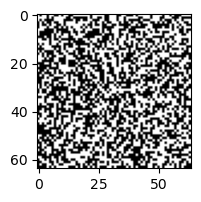

PyObject <matplotlib.image.AxesImage object at 0x0000019F3B0DBA30>

In [27]:
image = key; 
f = figure(figsize=(2,2)) # make a new figure
ax = gca() # ax (axes) designates the drawing area in the figure
ax[:imshow](image,cmap=ColorMap("gray")) # ax[:imshow](image) plots the image in the drawing area

Let's now display the encrypted image. 

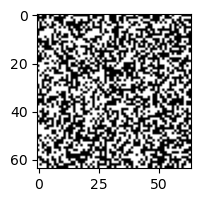

PyObject <matplotlib.image.AxesImage object at 0x0000019F3A9E95D0>

In [28]:
image = cipherImage;
f = figure(figsize=(2,2)) # make a new figure
ax = gca() # ax (axes) designates the drawing area in the figure
ax[:imshow](image,cmap=ColorMap("gray")) # ax[:imshow](image) plots the image in the drawing area

<b> Finish the code below to un-encrypt the encrypted image. What do you see on the resulting image? </b>

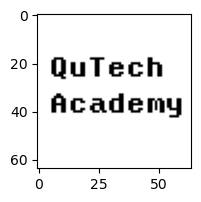

PyObject <matplotlib.image.AxesImage object at 0x0000019F3AA5C280>

In [29]:
unenc_image = (cipherImage + key) .% 2 ;     # alter this to decode the image 

image = unenc_image;
f = figure(figsize=(2,2)) # make a new figure
ax = gca() # ax (axes) designates the drawing area in the figure
ax[:imshow](image,cmap=ColorMap("gray")) # ax[:imshow](image) plots the image in the drawing area


<a id="qotp"></a>
<h2 style="color:#00A6D6;"> Quantum One Time Pad </h2>

Let's now turn to the Quantum one time pad, and let's encrypt arbitrary qubits! Remember that the quantum one time pad encrypts the qubit
$$ \lvert \psi \rangle = \alpha \lvert 0 \rangle + \beta \lvert 1 \rangle $$
into 
$$\lvert \Psi_{\rm enc}\rangle = X^{k_0} Z^{k_1}\lvert \psi \rangle,$$ where $X$ and $Z$ are the Pauli matrices, and $k_0$, $k_1$ make up the shared key.

To decrypt, Bob computes $Z^{k_1} X^{k_0} \lvert \Psi_{\rm enc}\rangle$. 

Let's try the quantum one time pad using Julia code!

In [36]:
# The key
k0 = 0;
k1 = 1;

# psi = alpha |0> + beta |1> . Change to your liking.
α = cos(pi/8);
β = sin(pi/8);
ψ = [α; β];

# The Pauli X and Z matrices
pX = [0 1 ; 1 0];
pZ = [1 0 ; 0 -1];

# The encrypted qubit
psiEnc = pX^k0 * pZ^k1 * ψ;

# The decrypted qubit
psiDec = pZ^k1 * pX^k0 * psiEnc;

# Now, let us calculate the average state over all possible key combinations.

rho = zeros(2,2); # initialize with an array filled with zero's
for k0 in 0:1, k1 in 0:1
    ψ_dec = (pX^k0)*(pZ^k1)*psiEnc # transform psi according to k0 and k1
    rho += ψ_dec * ψ_dec';
end

rho = rho/4; # normalize since p(k0,k1) = 1/4

# Let's print everything, rounding to 3 digits
print("Original qubit ", round.(ψ,digits=3), "\n");
print("Encrypted qubit ", round.(psiEnc,digits=3), "\n");
print("Decrypted qubit ", round.(psiDec,digits=3), "\n");
print("Average state over all possible keys \n", round.(rho,digits=3));

Original qubit [0.924, 0.383]
Encrypted qubit [0.924, -0.383]
Decrypted qubit [0.924, 0.383]
Average state over all possible keys 
[0.5 0.0; 0.0 0.5]

To understand this average state over all possible keys it is instructive to visualize the different states on the Bloch sphere, along with the average state. 

In [37]:
# States are taken from the previous piece of code! Change the state there to see what happens!

f5 = figure(figsize=(10,10)) # let us make a plot figure
b5 = Bloch()

# we want to manipulate our view angle, the key and we might want to see what Eve sees.
@manipulate for view_angle = [60,15,-30]
    clear(b5)
    for k0 in 0:1, k1 in 0:1
        ψ_enc = (pX^k0)*(pZ^k1)*ψ # transform psi according to k0 and k1
        v = ket_to_bloch(ψ_enc) # constuct the associated bloch vector   
        add_vector(b5,v, "\$k_0,k_1 =\$ $k0, $k1") # add the encoded state   
    end
    add_point(b5,[0,0,0],"average state", 100) # on average the encoded states are located in the center.

    withfig(f5) do  
        render(b5,view_angle)
    end 
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["view_angle"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 3, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(2), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\swehner\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\swehner\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\swehner\\.julia\\packages\\InteractBase\\LJXv3\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\swehner\\.julia\\packages\\InteractBase\\LJXv3\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\swehner\\.julia\\packages\\Interact\\PENUy\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable) @0x0000019f79a6c010, Task (runnable) @0x0000019f79a6c010), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (0, 1784424040944, 1784456637872)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"60\",\"15\",\"-30\"],\"changes\":WebIO.getval({\"name\":\"chan

<h3 style="color:#00A6D6;">Exercise 5 </h3>

Suppose the key that Alice and Bob share is $k_0k_1 = 10$. Bob receives the encrypted qubit 

$$|\psi_\text{enc}\rangle = \frac{1}{\sqrt{3}}|0\rangle + \sqrt{\frac{2}{3}}|1\rangle \:. $$

What is the decrypted qubit $|\psi\rangle$ that Alice wanted to send?

Remember to decrypt, Bob computes $Z^{k_1} X^{k_0} \lvert \Psi_{\rm enc}\rangle$. 


In [17]:
# in case you'd like to make use of code your code may go here

<a id="cqstates"></a>
<h2 style="color:#00A6D6;"> Classical Quantum States </h2>

When considering two systems $X$ and $A$ we saw that their joint state can be in a very special state namely a $cq$-state, short for classical-quantum state. This naming reflects the fact that register $X$ just captures a classical probability distribution over what states $\rho_x^A$ are prepared on $A$.

$$ \rho_{XA} = \sum_{x} p_x \cdot \lvert x \rangle \langle x \rvert^X \otimes \rho_x^A \:.$$

As matrices, these states have a very special form, which we will investigate now! Investigate the example of $X$ and $A$ just being a single qubit using the code below. What do you conclude about (the form of the matrix) $\rho_{XA}$?

In [18]:
# Let's construct a cq state where X and A are qubits

# |0> and |1> and the corresponding density matrices |0><0| and |1><1| on X
v0 = [1;0];
v1 = [0;1];
xx_0 = v0 * v0';   # |0><0|
xx_1 = v1 * v1';   # |1><1|

# let's choose probabilities
p0 = 0.5;
p1 = 1 - p0;

# states on A
rho_0 = [0.5 0; 0 0.5];
rho_1 = [0 0; 0 1];

# Constructint he cq state
rho_XA = p0 * kron(xx_0,rho_0) + p1 * kron(xx_1,rho_1);

println("Probabilities: \n\n p_0 = $p0 \n p_1 = $p1 \n")
println("Quantum states on A: \n \n rho_0 = \n $rho_0 \n\n rho_1 = \n $rho_1 \n")
println("CQ state: \n\n rho_XA = \n $rho_XA")

Probabilities: 

 p_0 = 0.5 
 p_1 = 0.5 

Quantum states on A: 
 
 rho_0 = 
 [0.5 0.0; 0.0 0.5] 

 rho_1 = 
 [0 0; 0 1] 

CQ state: 

 rho_XA = 
 [0.25 0.0 0.0 0.0; 0.0 0.25 0.0 0.0; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.5]


<h3 style="color:#00A6D6;">Exercise 6</h3>

Given quantum states

$$ \rho_0^A \:\:  = \lvert - \rangle \langle - \rvert $$

$$ \rho_1^A \:\: = \lvert + \rangle \langle + \rvert $$

and probabilities

$$ p_0 = \frac{2}{3}, \quad p_1 = \frac{1}{3} $$

<b> construct the associated classical quantum state: the 4 by 4 density matrix $\rho_{XA}$.</b>

In [19]:
# Any Julia code you'd like to use may go here

----
<a id="gmeasurements"></a>
<h2 style="color:#00A6D6;"> Generalized Measurements </h2>

As we have learned, we can perform measurements which are more complicated than simply measuring the entire state in a basis! This will be very useful for making a partial measurement, but also to explore what happens if we have two quantum systems $A$ and $B$, but we decide to measure only $A$. 

As an interesting example of a partial measurement, let's imagine that we have $2$ qubits. Instead of measuring in the standard basis, we are actually only interested in the parity in the standard basis. Interestingly enough we could peform a measurement with the following measurement operators, where the outcome corresponds to the parity

$$M_0 = |0\rangle\langle 0| \otimes |0\rangle \langle 0| + |1\rangle\langle 1| \otimes |1\rangle \langle 1| = |00\rangle\langle 00| + |11\rangle\langle 11|$$
$$M_1 = |1\rangle\langle 1| \otimes |0\rangle \langle 0| + |0\rangle\langle 0| \otimes |1\rangle \langle 1| = |01\rangle\langle 01| + |10\rangle\langle 10|$$

Why bother? We could of course just measure in the standard basis, and then compute the parity bases on the classical measurement outcomes? 

It turns out that the post-measurement state of these two approaches differs. Performing a measurement with the operators above the post-measurement we get when measuring $\rho$ are

$$\text{Post-measurement state after outcome 0: }\qquad\rho_\text{post 0} = \frac{M_0 \rho M_0^\dagger}{Tr\left(M_0 \rho M_0^\dagger\right)}$$
$$\text{Post-measurement state after outcome 1: }\qquad\rho_\text{post 1} = \frac{M_1 \rho M_1^\dagger}{Tr\left(M_1 \rho M_1^\dagger\right)}$$

However, the post-measurement states that we would get for measuring in the standard basis are just given by the standard basis elements $\{|00\rangle, |01\rangle,|01\rangle,|11\rangle\}$. Even if we were to forget the measurement outcomes and just remember the parity we would have the following density matrices only

$$\text{Post-measurement state for parity 0, full measurement: }\qquad\sigma_\text{post 0} = \frac{|00\rangle\langle 00|\rho |00\rangle\langle 00| + |11\rangle\langle 11| \rho |11\rangle \langle 11|}
{Tr\left(M_0 \rho M_0^\dagger\right)}$$
$$\text{Post-measurement state for parity 1, full measurement: }\qquad \sigma_\text{post 1} = \frac{|01\rangle\langle 01| \rho |01\rangle \langle 01|+|10\rangle\langle 10| \rho |10\rangle \langle 10|}
{Tr\left(M_1 \rho M_1^\dagger\right)}$$

Let's explore this difference!

In [41]:
# State to be measured - change this to explore! 

# Suggested example states
epr = [1;0;0;1]/sqrt(2);
singlet = [0;1;-1;0]/sqrt(2);

rho = kron(epr',epr); # Default is the EPR pair on two qubits

# Let's first define the standard basis for two qubits
v00 = [1; 0; 0; 0];
v01 = [0; 1; 0; 0];
v10 = [0; 0; 1; 0];
v11 = [0; 0; 0; 1];

# Let's define the projectors onto the standard basis elements
proj00 = v00*v00';
proj01 = v01*v01';
proj10 = v10*v10';
proj11 = v11*v11';

# Let's define the parity measurement operators
M0 = proj00 + proj11;
M1 = proj01 + proj10;

# Let's compute the probabilites of seeing parity 0 and parity 1
p0 = tr(M0 * rho); # Just one M0 - it's a projector so M0 * M0 = M0
p1 = tr(M1 * rho);

# Let's compute the post measurement states
rhoPost0 = M0*rho*M0'/p0;
rhoPost1 = M1*rho*M1'/p1;

sigmaPost0 = (proj00*rho*proj00 + proj11*rho*proj11)/p0;
sigmaPost1 = (proj01*rho*proj01 + proj10*rho*proj10)/p1;

# Let's display the matrices, rounding to 3 digits
if(p0 > 0)
    print("Post measurement state after outcome 0, parity measurement\n");
    display(round.(rhoPost0,digits=3));
    print("Post measurement state of parity 0 (avergaged over 00 and 11), full measurement\n");
    display(round.(sigmaPost0,digits=3));
else
    print("Outcome 0 never occurs - no even parity components \n")
end

if(p1 > 0)
    print("Post measurement state after outcome 1, parity measurement\n");
    display(round.(rhoPost1,digits=3));
    print("Post measurement state for parity 1, full measurement\n");
    display(round.(sigmaPost1,digits=3));
else
    print("Outcome 1 never occurs - no odd parity components \n")
end

Post measurement state after outcome 0, parity measurement


4×4 Matrix{Float64}:
 0.5  0.0  0.0  0.5
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.5  0.0  0.0  0.5

Post measurement state of parity 0 (avergaged over 00 and 11), full measurement


4×4 Matrix{Float64}:
 0.5  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.5

Outcome 1 never occurs - no odd parity components 


<h3 style="color:#00A6D6;"> Exercise 7 </h3>

Let's now explore generalized measurements when measuring one of several qubits! Imagine that Alice and Bob each have a qubit and that they have managed to prepare the qubits in the entangled state 

$$ \lvert \psi_{AB} \rangle = \frac{1}{\sqrt2} \Big( \lvert 00 \rangle_{AB} + \lvert 11 \rangle_{AB} \Big)\:. $$

Written as a density matrix, the state is thus

$$ \rho_{AB} = \lvert \psi_{AB} \rangle \langle \psi_{AB} \rvert $$

Now imagine that Alice measures the state of her qubit $A$ in the standard basis. This measurement can be described using the following measurement operators in which we tensor the elements of the standard basis on Alice's qubit $A$ with the identity (i.e., ''do nothing'') on Bob's qubit $B$.

$$ M_0^A = \lvert 0 \rangle \langle 0 \rvert_A \otimes I_B $$

$$ M_1^A = \lvert 1 \rangle \langle 1 \rvert_A \otimes I_B \:.$$

Accordingly the probability that Alice obtains outcomes $a$ when measuring is

$$ p_a = P(A=a) = \text{Tr} \Big( M_a^A \cdot \rho_{AB} \Big ) $$

<b> Compute $p_0$ and $p_1$. </b>


In [21]:
# Your Julia code goes here

<h3 style="color:#00A6D6;">Exercise 8</h3>

For the measurement considered above, what are the post-measurement states $\rho^{a}_{AB}$ on qubits $A$ and $B$ for Alice's measurement outcomes $a \in \{0,1\}$?

Compute the post-measurement states $\rho^0_{AB}$ and $\rho^1_{AB}$ for Alice's measurement.

To help you get started 

$$ \rho^{a=0}_{AB} = \frac{M_0^A \cdot \rho_{AB} \cdot  M_0^A}{p_{a=0}} $$  

$$ \rho^{a=1}_{AB} = \frac{M_1^A \cdot \rho_{AB} \cdot  M_1^A}{p_{a=1}} $$  

<a id="ptrace"></a>
<h2 style="color:#00A6D6;"> Partial Trace </h2>

We have just considered measurements performed by Alice and Bob on qubits A and B.

It turns out that Alice can effectively represent the state $\rho_A$ of her qubit A by "tracing out" qubit B. 


<h3 style="color:#00A6D6;"> Exercise 9 </h3>

Given 

$$ \rho_{AB} = \frac{1}{2} \cdot \begin{pmatrix} 1 & 0 & 0 & 1 \\ 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 \\ 1 & 0 & 0 & 1 \end{pmatrix} $$


(a.) <b> what is $\rho_A$? </b>

For clarity $\rho_A = \text{Tr}_B \Big( \rho_{AB} \Big)$.

(b.) <b> what are the measurement probabilities </b>

$$p_0 = \text{Tr}\big(\lvert 0 \rangle \langle 0 \rvert \cdot \rho_A\big)$$
$$p_1 = \text{Tr}\big(\lvert 1 \rangle \langle 1 \rvert \cdot \rho_A\big) \:?$$

Do you get the same results as in exercise 8? 

<h3 style="color:#00A6D6;"> Exercise 10 </h3>

A three party quantum state that has its own name is the GHZ state:

$$ \lvert GHZ \rangle =  \frac{1}{\sqrt{2}} \Big( \lvert 000 \rangle + \lvert 111 \rangle \Big) $$

Written as a density matrix, the state is thus:

$$ \rho_{ABC} = \lvert GHZ \rangle\langle GHZ \rvert$$

<b> Compute density matrices $\rho_{AB}$, $\rho_{BC}$ and $\rho_{AC}$ .</b>